Amanda Michelle Darwis - 0706022310051

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install kneed
from kneed import KneeLocator
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

# Data Preparation

In [193]:
# load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/COVID-19%20Coronavirus%20(2).csv"
df = pd.read_csv(url)
df.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   Other names              224 non-null    object 
 2   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 3   Population               225 non-null    int64  
 4   Continent                225 non-null    object 
 5   Total Cases              225 non-null    int64  
 6   Total Deaths             225 non-null    int64  
 7   Tot Cases//1M pop        225 non-null    int64  
 8   Tot Deaths/1M pop        225 non-null    int64  
 9   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


In [195]:
df.describe()

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,225.000000,225.000000,225.000000
mean,3.507321e+07,2.184781e+06,2.744813e+04,136900.373333,1096.715556,1.444125
std,1.392418e+08,7.275938e+06,9.689177e+04,145060.340289,1195.715543,1.741728
min,8.050000e+02,1.000000e+00,0.000000e+00,9.000000,0.000000,0.000000
25%,5.665570e+05,2.407100e+04,1.890000e+02,11384.000000,123.000000,0.511291
50%,5.827911e+06,1.639360e+05,1.965000e+03,88987.000000,708.000000,1.036905
75%,2.190585e+07,1.092547e+06,1.366000e+04,223335.000000,1795.000000,1.977017
max,1.439324e+09,8.183905e+07,1.008222e+06,696044.000000,6286.000000,18.151787


In [196]:
# show unique values from dataset
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'Country': array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
        'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
        'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
        'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
        'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
        'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei ',
        'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
        'Cameroon', 'Canada', 'CAR', 'Caribbean Netherlands',
        'Cayman Islands', 'Chad', 'Channel Islands', 'Chile', 'China',
        'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica',
        'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czechia', 'Denmark',
        'Djibouti', 'Dominica', 'Dominican Republic',
        'Democratic Republic of the Congo', 'Ecuador', 'Egypt',
        'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
        'Eswatini', 'Ethiopia', 'Faeroe I

In [197]:
# Check any duplicate values
df[df.duplicated(keep=False)]

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage


In [198]:
# drop Other Names because it's the same as the Country
df = df.drop('Other names', axis=1)
df.head()

,Country,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


# Data Transformation

In [199]:
df = df.rename(columns={
    'Tot\xa0Cases//1M pop': 'Total Cases/1M Population',
    'Tot\xa0Deaths/1M pop': 'Total Deaths/1M Population'
})

In [200]:
df.head()

,Country,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Total Cases/1M Population,Total Deaths/1M Population,Death percentage
0,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


# Exploratory Data Analysis (EDA)

In [201]:
import plotly.express as px
fig = px.choropleth(
    df,
    locations="ISO 3166-1 alpha-3 CODE",
    color="Continent",
    hover_name="Country",
    projection="natural earth",
    title="World Map of Countries by Continent"
)
fig.show()

The world heatmap above categorizes all sovereign nations into 6 major continental groups. Each continent has a distinct color (Asia, Europe, Africa, Latin America and the Caribbean, Oceania, Northern America)

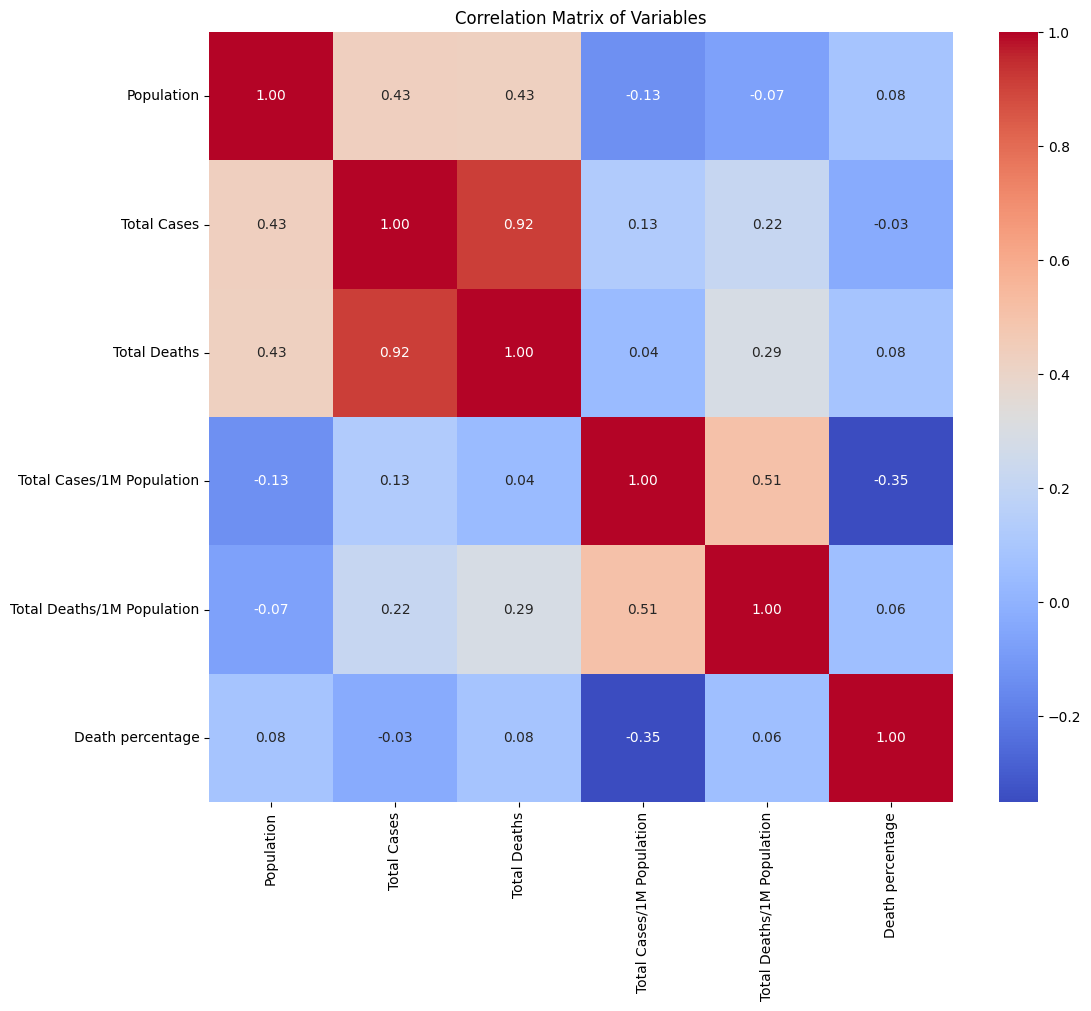

In [202]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Variables')
plt.show()

From the heatmap above, we can see that the highest correlation between variables in this dataset are Total Cases and Total Deaths

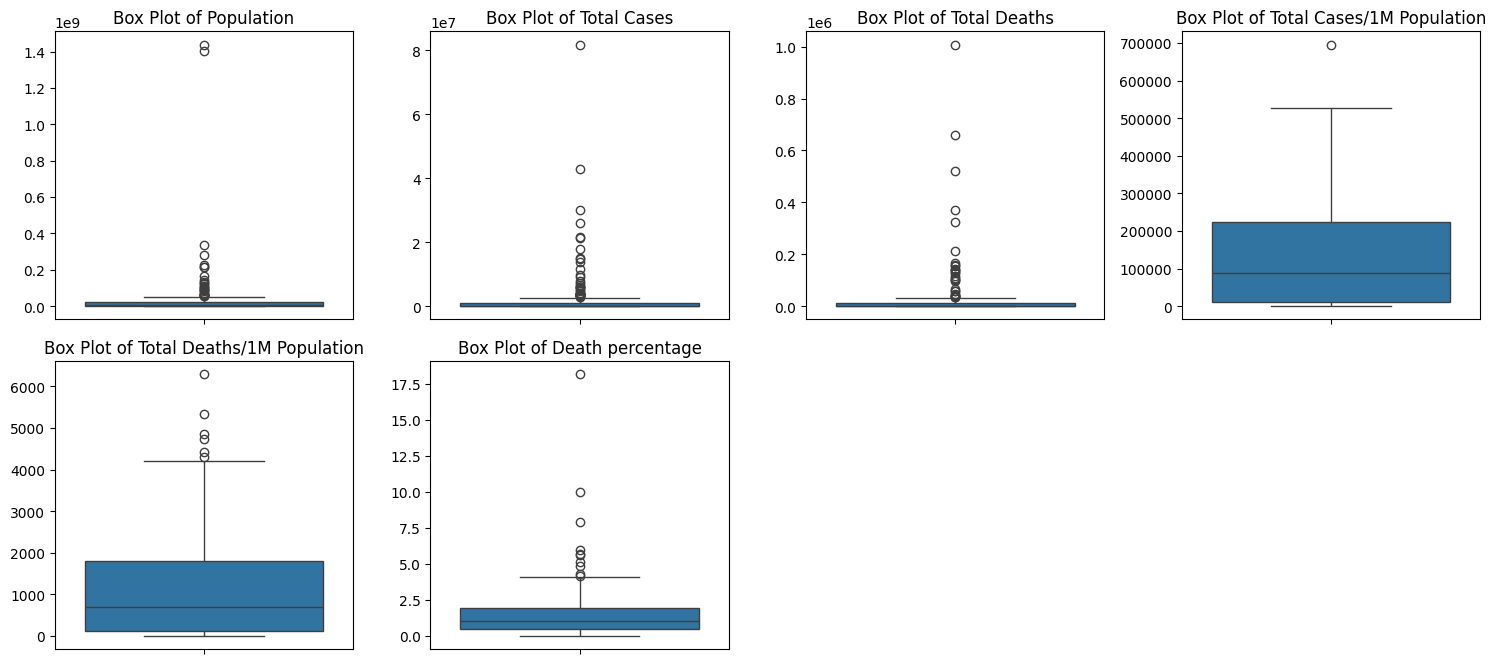

In [203]:
# Box Plot to detect any outliers
numerical_cols = df.drop(columns=['Country', 'Continent', 'ISO 3166-1 alpha-3 CODE']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 4, i + 1) # Adjust subplot grid as needed
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel('')
plt.tight_layout()
plt.show()

From the boxplots above, we can see that there are many variables with many outliers. That means we have to do scaling to clean the data first.

# Encoding


In [204]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

df_model = df.iloc[:,2:]

# Nominal Encoding
# Suppose you already fitted the encoder:
nominal_cols = ['Continent']
encoder = OrdinalEncoder()
df_model[nominal_cols] = encoder.fit_transform(df_model[nominal_cols])

# Build a mapping dictionary
encode_dict = {}

for col, cats in zip(nominal_cols, encoder.categories_):
    encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}

# Show the full dictionary
import pprint
pprint.pprint(encode_dict)

df_model.sample(n = 5)

{'Continent': {'Africa': 0,
               'Asia': 1,
               'Europe': 2,
               'Latin America and the Caribbean': 3,
               'Northern America': 4,
               'Oceania': 5}}


,Population,Continent,Total Cases,Total Deaths,Total Cases/1M Population,Total Deaths/1M Population,Death percentage
74,2535418,0.0,11988,365,4728,144,3.044711
158,33775745,3.0,3548559,212328,105062,6286,5.983499
210,48267221,0.0,163936,3595,3396,74,2.192929
99,60306185,2.0,14846514,159784,246186,2650,1.076239
178,8675762,2.0,1980722,15825,228305,1824,0.798951


# Data Scaling

In [205]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
sc = StandardScaler()

# Get numerical columns from df_model for scaling, excluding 'KMeans_Cluster' if it exists
# df_model already has 'Continent' encoded as numerical.
df_model_numerical_cols = [col for col in df_model.columns if df_model[col].dtype != 'object' and col != 'KMeans_Cluster']

df_model_scaled_numerical = pd.DataFrame(sc.fit_transform(df_model[df_model_numerical_cols]), columns=df_model_numerical_cols)

# Re-combine with the (already numerical) 'Continent' and 'KMeans_Cluster' if present
df_model = df_model_scaled_numerical.copy()
if 'Continent' in df_model.columns:
    df_model['Continent'] = df_model['Continent']
if 'KMeans_Cluster' in df_model.columns:
    df_model['KMeans_Cluster'] = df_model['KMeans_Cluster']

df_model.head()

,Population,Continent,Total Cases,Total Deaths,Total Cases/1M Population,Total Deaths/1M Population,Death percentage
0,0.038789,-0.509986,-0.276449,-0.204571,-0.915487,-0.759994,1.651243
1,-0.231774,0.168989,-0.263220,-0.247798,-0.287081,0.099982,-0.097285
2,0.073154,-1.188960,-0.264347,-0.212815,-0.905275,-0.791845,0.657760
3,-0.251891,0.168989,-0.295431,-0.282336,2.623123,0.736164,-0.611015
4,-0.003016,-1.188960,-0.287281,-0.264265,-0.926078,-0.873149,0.271204


# K-Means Clustering

In [206]:
from sklearn.cluster import KMeans

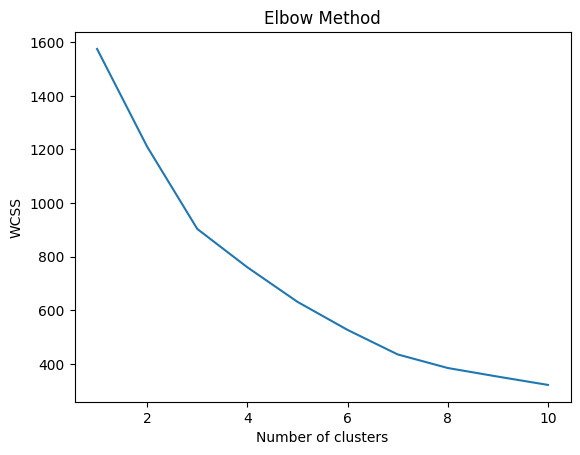

In [207]:
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_model)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [208]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters         WCSS
0                   1  1575.000000
1                   2  1210.100224
2                   3   903.368760
3                   4   760.253990
4                   5   631.357420
5                   6   526.617579
6                   7   435.183289
7                   8   384.513204
8                   9   352.348665
9                  10   321.407166


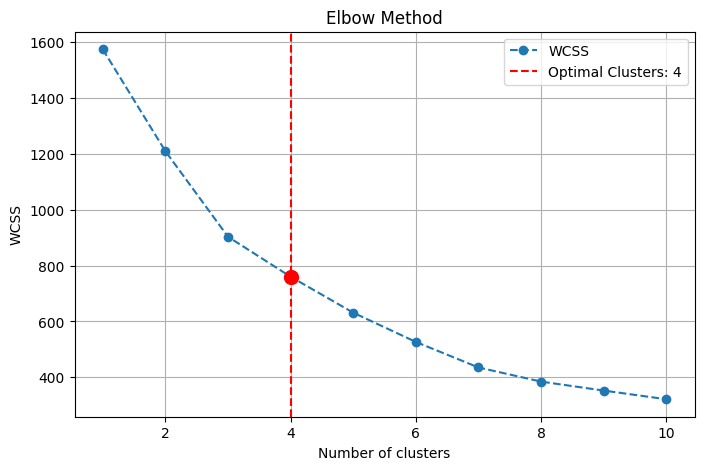

The optimal number of clusters is: 4


In [209]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

In [210]:
# Fit K-Means to the data with the optimal number of K cluster = 5
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_model)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster'] = clusters

# Show the df
df.head()

,Country,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Total Cases/1M Population,Total Deaths/1M Population,Death percentage,KMeans_Cluster
0,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743,0
1,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058,4
2,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216,0
3,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271,1
4,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438,0


# Agglomerative Clustering

## Silhouette Score

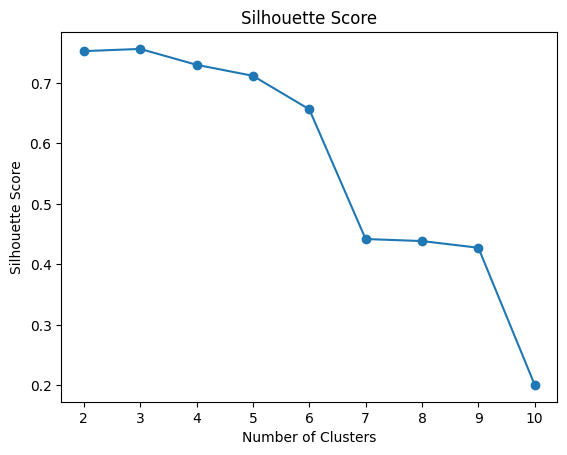

In [211]:
# this is way to show only 1 sillhouette score
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

silhouette_scores = []

for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single')
    cluster_labels = agglo_model.fit_predict(df_model)
    silhouette_avg = silhouette_score(df_model, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

## Comparing Silhouette Score to get best combination of linkage and metric

Skipping Ward linkage with Manhattan metric (not supported).


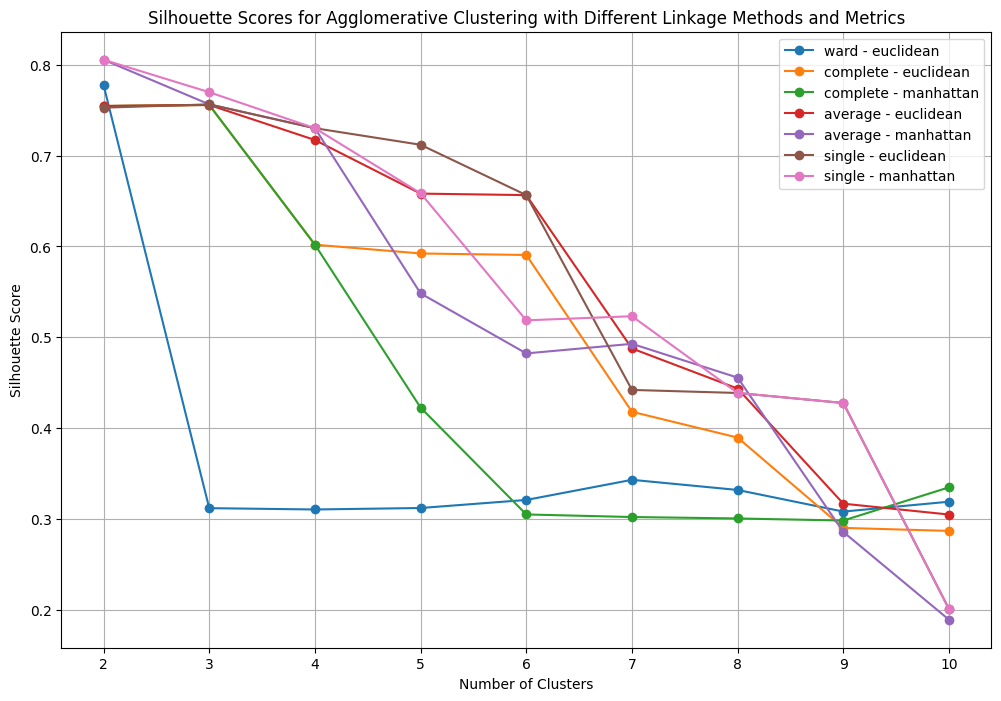

Best Silhouette Score: 0.8055712111257188
Optimal Number of Clusters: 2
Optimal Linkage Method: average
Optimal Metric: manhattan


In [212]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported . karena ward gabisa pake manhattan, cuma bisa pake euclidean.
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_model)
            silhouette_avg = silhouette_score(df_model, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")
# yg dipake addalah titik tertinggi di grafik (bisa 2)

## Dendogram Visualization

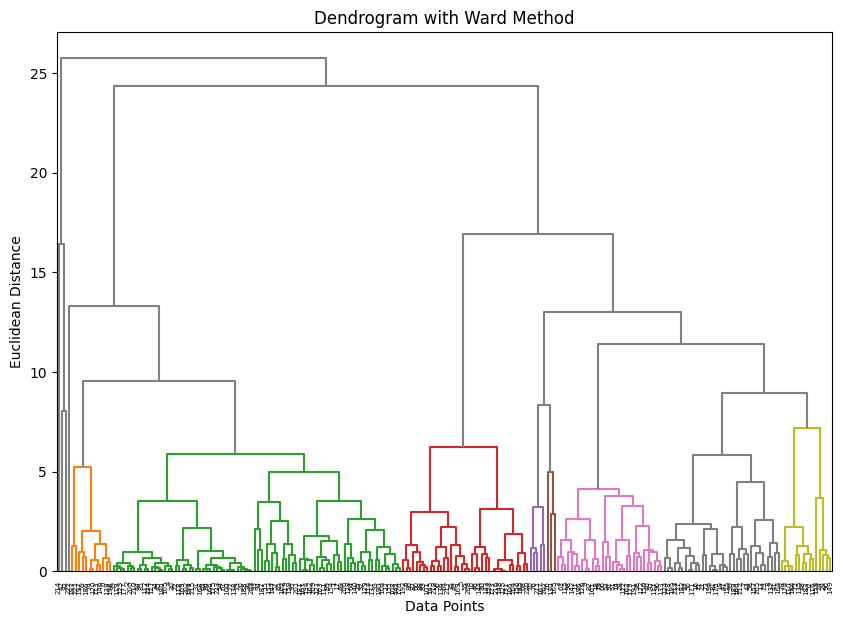

In [213]:
# Ward Method
linked = linkage(df_model, method='ward', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked, above_threshold_color="grey", color_threshold=7.5)
plt.title("Dendrogram with Ward Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

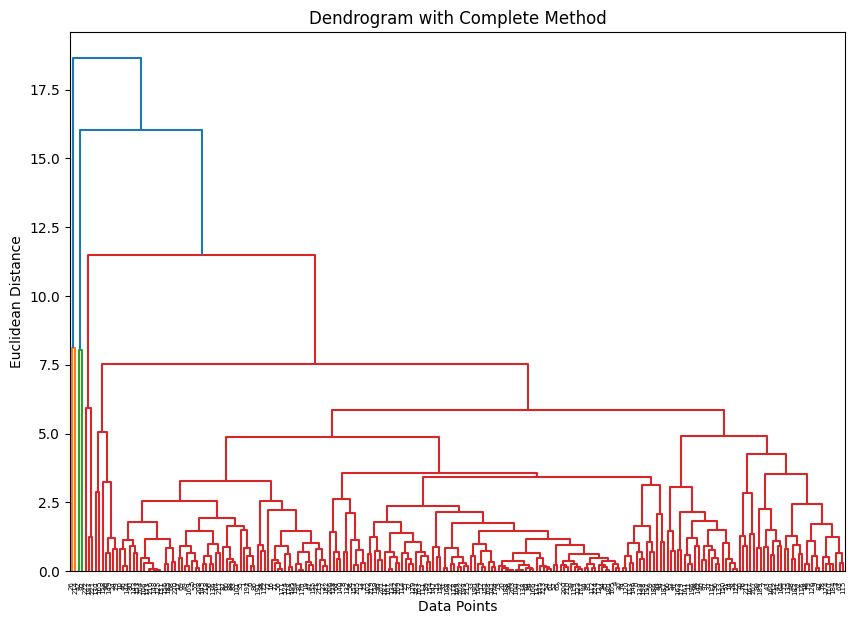

In [214]:
# Max Distance
linked = linkage(df_model, method='complete', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Complete Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

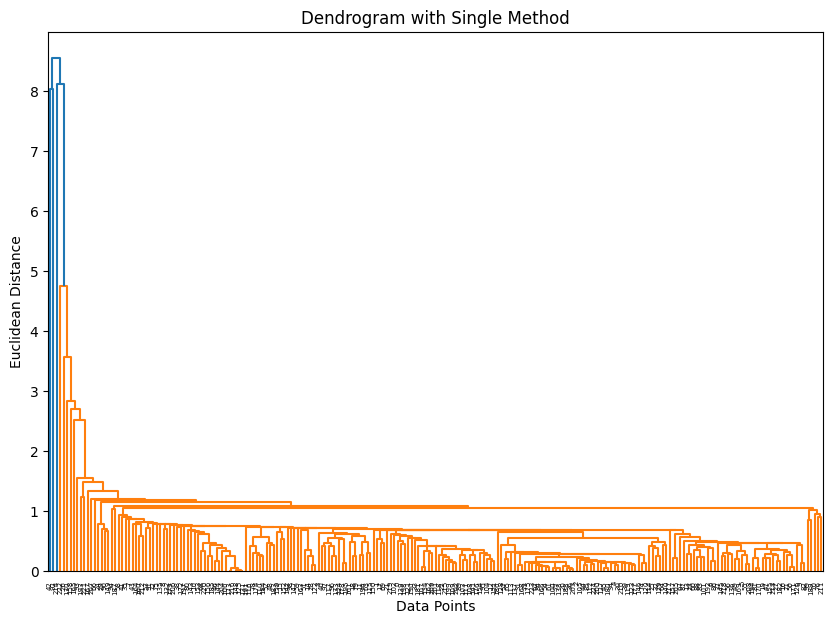

In [215]:
# Min Distance
linked = linkage(df_model, method='single')

# Plot dendrogram dengan color_threshold yang sesuai
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Single Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

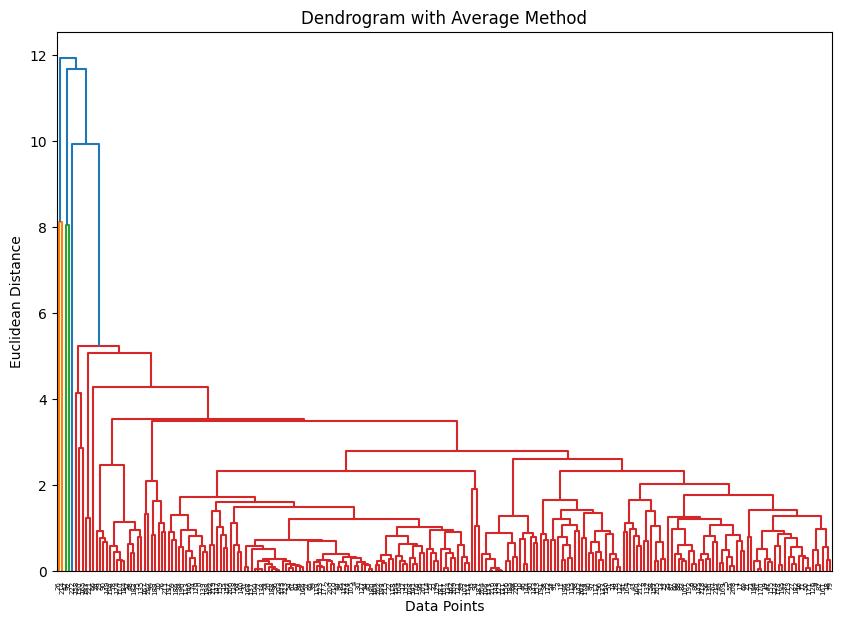

In [216]:
# Average Distance
linked = linkage(df_model, method='average', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Average Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

## Hierarchical Clustering Model

In [217]:
# Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_hc = agglo.fit_predict(df_model)

In [218]:
# Evaluation
ss = silhouette_score(df_model, y_hc)
print(ss)

0.8055712111257188


## Dendogram Visualization for Hierarchical Clustering Model

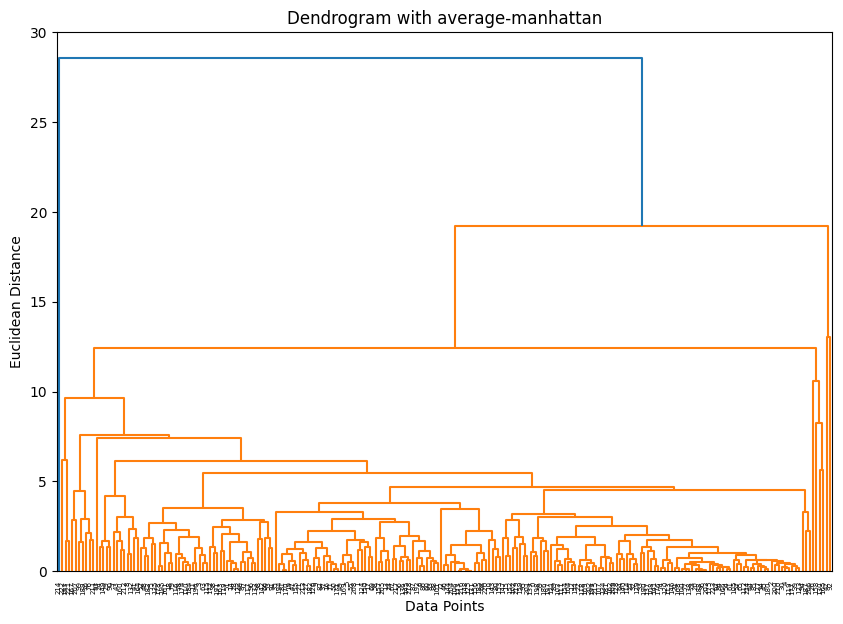

In [219]:
# Best Combination Parameter
fixed_metric = "cityblock" if best_metric == "manhattan" else best_metric

linked = linkage(df_model, method=best_linkage, metric=fixed_metric)

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with " + best_linkage + "-" + best_metric)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

## Merge with the original data

In [220]:
# Add the cluster labels to the original data
df['Agglo'] = y_hc

# Analyze the clusters with the original values
df.head()

,Country,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Total Cases/1M Population,Total Deaths/1M Population,Death percentage,KMeans_Cluster,Agglo
0,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743,0,0
1,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058,4,0
2,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216,0,0
3,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271,1,0
4,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438,0,0


# Comparison between K-Means and Hierachical Clustering (Agglomerative)

In [229]:
# Evaluation for Hierarchical Clustering
ss_hierarchical = silhouette_score(df_model, y_hc)
print(f"Hierarchical Clustering Silhouette Score: {ss_hierarchical}")
# Evaluation for K-Means Clustering
kmeans = df['KMeans_Cluster']
ss_kmeans = silhouette_score(df_model, kmeans)
print(f"K-Means Clustering Silhouette Score: {ss_kmeans}")

Hierarchical Clustering Silhouette Score: 0.8055712111257188
K-Means Clustering Silhouette Score: 0.32632984573633733


## Statistical Summary for each cluster

In [236]:
# Data summary for 'K-Means Cluster'
cluster_summary = df_model.groupby(df['KMeans_Cluster']).agg({
    'Population': ['mean', 'median'],
    'Continent': ['first', 'count'],
    'Total Cases': ['mean', 'median'],
    'Total Deaths': ['mean', 'median'],
    'Total Cases/1M Population': ['mean', 'median'],
    'Total Deaths/1M Population': ['mean', 'median'],
    'Death percentage': ['mean', 'median']
})

# Rename the <lambda> column in the Gender MultiIndex level
cluster_summary = cluster_summary.rename(columns={'first': 'mode'}, level=1)

cluster_summary = cluster_summary.rename_axis('cluster')

cluster_summary

Population           Continent       Total Cases            \
              mean    median      mode count        mean    median   
cluster                                                              
0        -0.015851 -0.142743 -0.509986    93   -0.194341 -0.283075   
1        -0.124126 -0.223375  0.168989    66    0.206884 -0.149718   
2         9.979451  9.979451 -0.509986     2    2.673247  2.673247   
3         1.725515  1.725515  0.847964     2    7.401721  7.401721   
4        -0.221670 -0.250174  0.168989    62   -0.253719 -0.295850   

        Total Deaths           Total Cases/1M Population            \
                mean    median                      mean    median   
cluster                                                              
0          -0.176427 -0.263986                 -0.714636 -0.879525   
1           0.153928 -0.176110                  1.178863  1.238628   
2           2.436637  2.436637                 -0.839587 -0.839587   
3           8.345356  8.345356                  0.381153  0.381153   
4          -0.247024 -0.280220                 -0.168176 -0.282890   

        Total Deaths/1M Population           Death percentage            
                              mean    median             mean    median  
cluster                                                                  
0                        -0.630500 -0.791845         0.289284 -0.036734  
1                         1.004142  0.888294        -0.204082 -0.436623  
2                        -0.762509 -0.762509         0.380005  0.380005  
3                         1.630087  1.630087         0.156693  0.156693  
4                        -0.151162 -0.219785        -0.233990 -0.347957

In [239]:
# Data summary for 'Hierarchical Cluster'
cluster_summary = df.groupby(y_hc).agg({
    'Population': ['mean', 'median'],
    'Continent': ['first', 'count'],
    'Total Cases': ['mean', 'median'],
    'Total Deaths': ['mean', 'median'],
    'Total Cases/1M Population': ['mean', 'median'],
    'Total Deaths/1M Population': ['mean', 'median'],
    'Death percentage': ['mean', 'median'],
    'KMeans_Cluster': ['first', 'count']
})

# Rename the <lambda> column in the Gender MultiIndex level
cluster_summary = cluster_summary.rename(columns={'first': 'mode'}, level=1)

cluster_summary = cluster_summary.rename_axis('cluster')

cluster_summary

Population                      Continent         Total Cases  \
                 mean       median              mode count          mean   
cluster                                                                    
0        3.373692e+07    5791800.0              Asia   224  1.829182e+06   
1        3.344006e+08  334400597.0  Northern America     1  8.183905e+07   

                     Total Deaths            Total Cases/1M Population  \
             median          mean     median                      mean   
cluster                                                                  
0          162753.0  2.306967e+04     1946.0             136418.973214   
1        81839052.0  1.008222e+06  1008222.0             244734.000000   

                  Total Deaths/1M Population         Death percentage  \
           median                       mean  median             mean   
cluster                                                                 
0         88662.0                1088.151786   683.0         1.445072   
1        244734.0                3015.000000  3015.0         1.231957   

                  KMeans_Cluster        
           median           mode count  
cluster                                 
0        1.027844              0   224  
1        1.231957              3     1

# Visualizations of the clusters

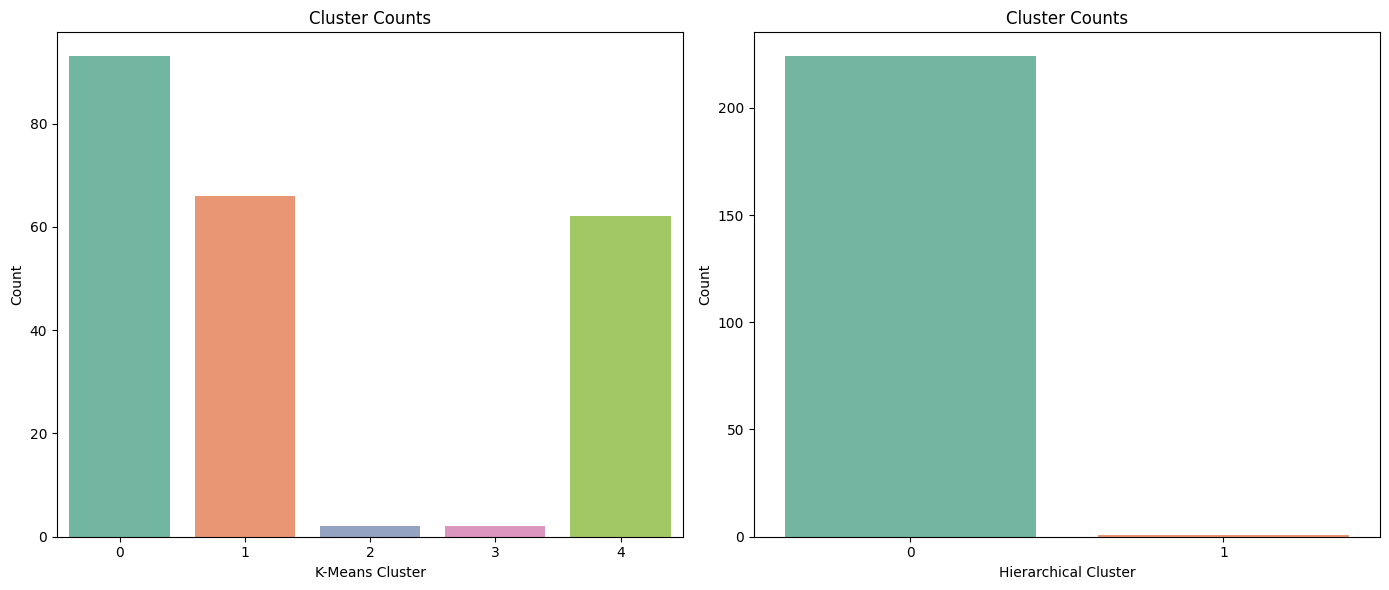

In [225]:
plt.figure(figsize=(14, 6))

# Scaled K-Means Clusters
plt.subplot(1, 2, 1)
sns.countplot(
    x='KMeans_Cluster',
    hue='KMeans_Cluster',
    data=df,
    palette='Set2',
    legend=False
)
plt.title('Cluster Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Count')

# Unscaled K-Means Clusters
plt.subplot(1, 2, 2)
sns.countplot(
    x='Agglo',
    hue='Agglo',
    data=df,
    palette='Set2',
    legend=False
)
plt.title('Cluster Counts')
plt.xlabel('Hierarchical Cluster')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

#### From the Box Plots above, we can see that:

**1. Population:**
-   **Distribution:** Highly right-skewed with a large number of outliers on the higher end.
-   **Central Tendency (Median):** Appears to be relatively low, indicating that most countries have smaller populations.
-   **Interquartile Range (IQR):** Small, suggesting that the majority of countries have populations clustered around the lower end.
-   **Outliers:** Many significant outliers far above the upper whisker, representing countries with very large populations (e.g., China, India, USA). These outliers heavily distort the scale of the plot.

**2. Total Cases:**
-   **Distribution:** Extremely right-skewed, similar to Population, with many high-value outliers.
-   **Central Tendency (Median):** Very low, indicating most countries have a relatively small number of total COVID-19 cases.
-   **Interquartile Range (IQR):** Small, showing that the bulk of countries fall into a lower range of total cases.
-   **Outliers:** Numerous extreme outliers, suggesting a few countries have disproportionately high total case counts (e.g., USA, India, Brazil, European countries).

**3. Total Deaths:**
-   **Distribution:** Also heavily right-skewed with numerous outliers on the higher end.
-   **Central Tendency (Median):** Very low, indicating that most countries have reported a small number of total COVID-19 deaths.
-   **Interquartile Range (IQR):** Small, reflecting that the majority of countries have death counts concentrated at the lower end.
-   **Outliers:** Many significant outliers, which are likely countries with very high death tolls (e.g., USA, Brazil, India, UK).

**4. Tot Cases//1M pop (Total Cases per 1 Million Population):**
-   **Distribution:** Right-skewed, but less extreme than 'Total Cases' or 'Population', with a considerable number of outliers.
-   **Central Tendency (Median):** Higher than 'Total Cases', as this metric normalizes for population size, but still suggests a varied experience.
-   **Interquartile Range (IQR):** Moderate, indicating a wider spread for the middle 50% of countries when cases are considered per capita.
-   **Outliers:** Several high outliers exist, pointing to countries that had a very high number of cases relative to their population, potentially smaller nations or those severely hit (e.g., small European nations, specific island states).

**5. Tot Deaths/1M pop (Total Deaths per 1 Million Population):**
-   **Distribution:** Right-skewed, similar to 'Tot Cases//1M pop', with multiple outliers.
-   **Central Tendency (Median):** Moderate, showing the median number of deaths per million population.
-   **Interquartile Range (IQR):** Moderate.
-   **Outliers:** There are several high outliers, indicating countries with a significantly higher death rate relative to their population (e.g., Italy, Spain, UK, USA per capita).

**6. Death percentage:**
-   **Distribution:** Appears to be less skewed compared to the 'Total Cases' or 'Total Deaths' metrics, but still shows a right skew with some outliers.
-   **Central Tendency (Median):** Relatively low (around 1-2%), suggesting that for most countries, the percentage of reported cases resulting in death is small.
-   **Interquartile Range (IQR):** Relatively small, indicating that many countries have similar death percentages.
-   **Outliers:** A few outliers exist on the higher end, indicating countries with unusually high death percentages, which could be due to various factors like healthcare system capacity, reporting methods, or demographics. There might also be a lower outlier close to zero, representing countries with very few or no reported deaths (or a very low case fatality rate).

**General Observations:**
- All variables show a right-skewed distribution, indicating that the majority of countries have lower values, while a few countries stand out with significantly higher values. This is typical for global health or demographic data where a few large or heavily impacted entities exist.
- The presence of numerous outliers in 'Population', 'Total Cases', and 'Total Deaths' highlights the immense disparity in size and impact of the pandemic across countries.
- The per capita metrics ('Tot Cases//1M pop' and 'Tot Deaths/1M pop') help to normalize some of these disparities, showing different sets of outliers that might be small countries heavily affected.

In [240]:
fig_kmeans = px.choropleth(
    df,
    locations="ISO 3166-1 alpha-3 CODE",
    color="KMeans_Cluster",
    hover_name="Country",
    projection="natural earth",
    title="World Map of K-Means Clusters"
)
fig_kmeans.show()

In [241]:
fig_agglo = px.choropleth(
    df,
    locations="ISO 3166-1 alpha-3 CODE",
    color="Agglo",
    hover_name="Country",
    projection="natural earth",
    title="World Map of Agglomerative Clusters"
)
fig_agglo.show()

#### Insights from K-Means Cluster Heatmap:

**Geographical Patterns:**
*   **Cluster 0:** Appears to be widespread, covering many countries across Asia, Africa, and parts of Europe and Latin America. This suggests a large group of countries with similar characteristics based on the KMeans algorithm, likely representing the 'average' or 'common' COVID-19 profile. Some of these could be countries with moderate cases/deaths or specific population densities.
*   **Cluster 1:** Seems to encompass a significant number of European countries, North America, and some parts of South America. This cluster might represent regions with higher cases per capita or more developed healthcare systems, which could influence reporting.
*   **Cluster 2, 3, 4:** These clusters might be smaller in geographical spread or represent specific outlier countries. It's common in K-Means for a few clusters to contain very few, but distinct, data points, especially with skewed data like COVID-19 statistics. For instance, a cluster might highlight countries with extremely high total cases or population due to their sheer size.

**Key Insights:**
*   K-Means tends to create more balanced cluster sizes but the geographical distribution can still be diverse within a cluster.
*   The clustering seems to identify broad regional similarities, but also mixes countries from different continents, indicating that the chosen features (population, total cases, deaths, etc.) are driving the grouping more than purely geographical proximity.
*   Outliers or very large countries might form their own small clusters or significantly influence the centroids of larger clusters.

#### Insights from Agglomerative Cluster Heatmap:

**Geographical Patterns:**
*   **Cluster 0 (or the dominant cluster):** Given the silhouette score analysis, Agglomerative clustering with optimal parameters ('average' linkage, 'manhattan' metric, 2 clusters) resulted in a very uneven distribution. It's highly likely that one cluster (say, Cluster 0) dominates the map, covering almost all countries globally.
*   **Cluster 1 (or the minority cluster):** This cluster would represent a very small number of countries, possibly even just one, that are extremely distinct from the rest based on the features. This is consistent with hierarchical clustering's tendency to isolate outliers, especially with 'average' or 'single' linkage which can be sensitive to noise or extreme values.

**Key Insights:**
*   The Agglomerative clustering, with the identified optimal parameters, results in a highly imbalanced clustering. This suggests a strong dichotomy in the dataset, where one or a few entities are significantly different from the vast majority.
*   This highly imbalanced clustering (e.g., one huge cluster and one tiny one) might indicate that most countries share a fundamental set of characteristics, while a very few possess extreme values for certain features (e.g., USA, China for Population/Total Cases).
*   Comparing to K-Means, the Agglomerative result highlights extreme distinctions rather than nuanced groupings, making it useful for identifying true outliers in the data.

### General Insights

*   The K-Means clustering provided nuanced insights into broad regional similarities based on COVID-19 related features, suggesting that similar profiles can exist across diverse geographies.
*   Agglomerative clustering proved effective in identifying extreme distinctions or potential outliers, indicating that a small number of countries significantly deviate from the global norm based on the analyzed metrics. Further investigation into the specific characteristics of these outlier countries could be beneficial.


### Policy Recommendations:

Based on the distinct characteristics of each K-Means cluster, here are specific government policy recommendations:

**1. Cluster 0 (Low Impact, Average Death Percentage, mostly African Nations):**
   - **Focus:** Continued vigilance, strengthening primary healthcare systems, and ensuring equitable access to future health resources.
   - **Recommendations:**
     - Implement robust surveillance systems to monitor emerging health threats.
     - Invest in and expand primary healthcare infrastructure and personnel, especially in rural areas.
     - Develop and maintain national stockpiles of essential medical supplies and vaccines.
     - Foster international partnerships to secure equitable access to health innovations and resources.
     - Conduct regular public health awareness campaigns focusing on hygiene and preventative measures.

**2. Cluster 1 (Moderate to High Total Impact, High Per-Capita Impact, Lower Death Percentage, mostly European Nations):**
   - **Focus:** Robust public health infrastructure, effective testing and tracing, managing hospital capacity, and sustained public awareness campaigns.
   - **Recommendations:**
     - Maintain and continuously upgrade public health infrastructure, including advanced diagnostic labs and treatment facilities.
     - Implement efficient and scalable test-and-trace programs to quickly identify and isolate cases.
     - Develop dynamic hospital capacity management plans, including surge capacity for ICUs and specialized staff.
     - Launch sustained, targeted public awareness campaigns to ensure adherence to health guidelines and promote vaccination.
     - Invest in research and development for future pandemic preparedness and response technologies.

**3. Cluster 2 (Very High Total Cases/Deaths, Low Per-Capita Impact, Very Populous African Nations):**
   - **Focus:** Addressing challenges of managing large populations, localized health interventions, efficient resource allocation for high-burden areas, and data collection improvements.
   - **Recommendations:**
     - Decentralize health services to better reach and serve large, diverse populations.
     - Implement targeted, localized health interventions tailored to specific community needs and demographics.
     - Improve data collection and analysis capabilities to identify high-burden areas and inform resource allocation decisions.
     - Develop community engagement strategies to build trust and facilitate health program adoption.
     - Enhance logistical capabilities for rapid deployment of personnel and resources to critical areas.

**4. Cluster 3 (Very High Total Cases/Deaths, Significant Per-Capita Impact, Populous Latin American/Caribbean Nations):**
   - **Focus:** Aggressive public health measures, ensuring access to critical care, managing severe outbreaks in densely populated areas, and international collaboration for resource support.
   - **Recommendations:**
     - Enforce aggressive public health measures such as targeted lockdowns, social distancing, and mask mandates during outbreaks.
     - Strengthen critical care capacity in hospitals, including ICUs, ventilators, and trained medical staff.
     - Develop rapid response teams for managing severe outbreaks in densely populated urban centers.
     - Actively seek and participate in international collaborations for vaccine supply, medical equipment, and expertise sharing.
     - Implement social support programs to mitigate the economic impact of public health measures on vulnerable populations.

**5. Cluster 4 (Low Total Cases/Deaths, Low Per-Capita Impact, Lower Death Percentage, mostly European Nations with Small Populations):**
   - **Focus:** Maintaining strong border controls, rapid response mechanisms for small outbreaks, and leveraging agile systems for quick vaccine rollout or preventative measures.
   - **Recommendations:**
     - Implement strict border control and travel regulations, including mandatory testing and quarantine, to prevent external introductions.
     - Establish highly agile and rapid response mechanisms for immediate containment of any detected small outbreaks.
     - Leverage small population size for efficient and quick rollout of vaccination programs and other preventative health campaigns.
     - Invest in advanced digital health solutions for contact tracing and health certificate management.
     - Maintain high levels of public health education to ensure community compliance and participation in preventative strategies.


Based on the distinct characteristics of each Agglomerative cluster, here are specific government policy recommendations:

**1. Cluster 0 (Majority Cluster - 224 countries):**
   *   **Characteristics:** This cluster encompasses the vast majority of countries (224), showing diverse populations but generally moderate per-capita impact (mean Total Cases/1M Pop 136k, mean Total Deaths/1M Pop 1088). While the absolute numbers for cases and deaths vary widely (mean Total Cases 1.83e+06, mean Total Deaths 2.31e+04), the median values are much lower (median Total Cases 1.63e+05, median Total Deaths 1946), indicating that most countries in this cluster have a relatively lower burden. The death percentage is around the global average (1.45%). This cluster represents a broad spectrum of countries with varying resource levels and public health capacities.
   *   **Focus:** Broad public health strategies, adaptable resource management, and international cooperation to bolster pandemic preparedness and response across diverse contexts.
   *   **Recommendations:**
      *   **Strengthen Universal Health Coverage:** Invest in and reinforce primary healthcare systems to ensure basic health services and pandemic response capabilities are accessible to all citizens, irrespective of their socio-economic status or geographic location.
      *   **Flexible Pandemic Response Frameworks:** Develop scalable and adaptable public health frameworks that can be tailored to local epidemiological situations, cultural contexts, and resource availability within the country.
      *   **Regional Collaboration and Resource Sharing:** Foster stronger regional alliances for coordinated disease surveillance, rapid sharing of scientific knowledge, and mutual aid in terms of medical supplies, personnel, and vaccine distribution.
      *   **Public Health Education & Trust-Building:** Implement continuous and culturally sensitive public health education campaigns to promote preventative behaviors and build public trust in health authorities, which is crucial for compliance during crises.
      *   **Economic Resilience Support:** Integrate public health measures with economic support programs to mitigate the impact of pandemics on vulnerable populations and small businesses, ensuring that health policies are sustainable.

**2. Cluster 1 (Outlier Cluster - 1 country, likely the United States):**
   *   **Characteristics:** This cluster consists of a single country (Population 3.34e+08), identified by its extremely high absolute numbers for total cases (8.18e+07) and total deaths (1.01e+06). Its per-capita rates (Total Cases/1M Pop 244k, Total Deaths/1M Pop 3015) are also high, indicating a significant impact relative to its large population. Interestingly, its death percentage (1.23%) is not the highest, suggesting that while it had a massive number of infections, its case fatality rate was in line with or even slightly lower than the majority. This country's sheer size and interconnectedness present unique challenges.
   *   **Focus:** Managing large-scale outbreaks in a vast, populous, and interconnected nation; ensuring equitable access to advanced medical care; strengthening federal-to-local coordination; and addressing disparities in health outcomes.
   *   **Recommendations:**
      *   **Sustained National Public Health Infrastructure:** Establish and continuously fund a robust national public health agency capable of leading and coordinating large-scale responses, including advanced pathogen surveillance, rapid vaccine/therapeutic development, and logistical coordination for resource deployment.
      *   **Decentralized, Coordinated Response:** Implement strong federal guidance alongside empowered state/local health departments, enabling tailored responses that account for regional differences while maintaining national cohesion and resource allocation strategies.
      *   **Equitable Access to Advanced Care:** Prioritize policies that ensure equitable access to critical medical care, testing, vaccinations, and treatments across all demographic groups and geographic regions, addressing pre-existing health disparities.
      *   **Data-Driven Decision Making & Communication:** Invest in advanced data analytics to monitor disease spread, predict surges, and evaluate intervention effectiveness. Implement transparent and consistent public communication strategies to maintain trust and inform citizens.
      *   **Strategic National Stockpiling & Supply Chain Resilience:** Maintain robust national stockpiles of essential medical supplies and actively work to diversify and strengthen domestic and international supply chains to prevent shortages during future health crises.
      *   **Addressing Misinformation:** Develop proactive strategies to combat health-related misinformation and disinformation, which can significantly hamper public health efforts in a large and diverse population.